<image src="https://drive.google.com/uc?export=view&id=1EkMx11lT2DiUqxM5Y0pmiBZnb1aPp-Tu" width=100%>

In [ ]:
# Elaborado por:
# Ana Mantilla : anagmd2019@gmail.com
# Paul Goyes : goyes.yesid@gmail.com

In [ ]:
# Clonar este notebook con el repositorio de GitHub para acceder a los datos de las variables de entrada

!git clone https://github.com/Anagabrielamantilla/MineralPrediction.git

fatal: destination path 'MineralPrediction' already exists and is not an empty directory.


# **Modelo de bosques aleatorios**

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Cargar los datos**

In [ ]:
#Importar las librerías 

import pandas as pd #usada para cargar los datos delimitados por comas (.csv)
import numpy as np #usada para extraer los valores de píxel del ráster en una matriz 
import matplotlib.pyplot as plt #usada para graficar

In [ ]:
#Importar los datos 
   
df=pd.read_csv('/content/MineralPrediction/Data/04_Training.csv') 

In [ ]:
# Visualizar la tabla de datos 

df.head(2)

,DEP,PC9,PC8,PC7,PC6,PC5,PC4,PC3,PC2,PC1
0,0,0.00049,-0.19757,-1.27453,1.57498,1.33215,-0.69961,-1.07609,0.28853,0.11251
1,0,-0.00048,0.10828,-0.83615,1.93379,1.45474,-1.68057,-1.19802,-0.30925,0.06977


In [ ]:
#Extraer las variables de entrada y de salida de la tabla 

x_names = ['DEP','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
label = 'DEP'

X = df[x_names]
y = df['DEP']

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Importar librerías de bosques aleatorios**

In [ ]:
# Instalar librería para crear el modelo de bosques aleatorios

!pip install tensorflow_decision_forests

In [ ]:
#Importar las librerías

import tensorflow as tf 
import tensorflow_decision_forests as tfdf

In [ ]:
# Convertir dataframe a un dataset de tensorflow

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(X, label='DEP')

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Crear el modelo de bosques aleatorios**

In [ ]:
# Crear el modelo 

model = tfdf.keras.RandomForestModel(num_trees=2000, categorical_algorithm='CART')

Use /tmp/tmpvgev4g24 as temporary training directory


In [ ]:
#Definir la función de pérdida binary cross entropy 

lossf=tf.keras.losses.BinaryCrossentropy()

#Añadir función de pérdida

model.add_loss(lossf)


In [ ]:
#Compilar métricas

model.compile("accuracy")

In [ ]:
#Entrenar el modelo 

#@tf.autograph.experimental.do_not_convert #esto es para silenciar las advertencias en la celda

import time
start1 = time.time()
history=(model.fit(x=train_ds, callbacks=None))
end1 = time.time()
T1 = end1 - start1

Reading training dataset...


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Training dataset read in 0:00:04.737777. Found 148 examples.
Training model...
Model trained in 0:00:00.901312
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [ ]:
# Imprimir resumen del modelo

print(model.summary())

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (9):
	PC1
	PC2
	PC3
	PC4
	PC5
	PC6
	PC7
	PC8
	PC9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "PC5"  0.359025 ################
    2. "PC1"  0.329298 #############
    3. "PC8"  0.247228 #####
    4. "PC2"  0.243201 #####
    5. "PC3"  0.221545 ###
    6. "PC4"  0.200070 #
    7. "PC7"  0.194972 
    8. "PC6"  0.193269 
    9. "PC9"  0.189307 

Variable Importance: NUM_AS_ROOT:
    1. "PC1" 637.000000 ################
    2. "PC5" 584.000000 ##############
    3. "PC8" 353.000000 ########
    4. "PC2" 184.000000 ####
    5. "PC4" 83.000000 #
    6. "PC3" 67.000000 #
    7. "PC6" 48.000000 #
    8. "PC9" 39.000000

In [ ]:
# Imprimir un diagrama de grafo del modelo
  
dot_img_file= tfdf.model_plotter.plot_model_in_colab(model, max_depth=2)
dot_img_file

In [ ]:
# Evaluar el modelo

model.make_inspector().evaluation()

Evaluation(num_examples=148, accuracy=0.831081081081081, loss=0.38072140827598805, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

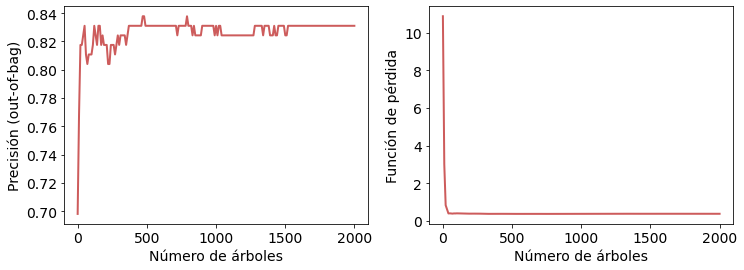

In [ ]:
#Graficar métricas

import matplotlib.pyplot as plt

logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs], color = 'indianred', linewidth=2)
plt.xlabel("Número de árboles", fontsize = 14, fontname='Times New Roman')
plt.ylabel("Precisión (out-of-bag)", fontsize = 14, fontname='Times New Roman')
plt.xticks([0,500,1000,1500,2000], fontsize = 14, fontname='Times New Roman')
plt.yticks(fontsize = 14, fontname='Times New Roman')

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs],  color = 'indianred', linewidth=2)
plt.xlabel("Número de árboles", fontsize = 14, fontname='Times New Roman')
plt.ylabel("Función de pérdida", fontsize = 14, fontname='Times New Roman')
plt.xticks([0,500,1000,1500,2000], fontsize = 14, fontname='Times New Roman')
plt.yticks(fontsize = 14, fontname='Times New Roman')

plt.show()

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Evaluar otras métricas con los datos de validación**

In [ ]:
# Cargar los datos de validación

val = pd.read_excel('/content/MineralPrediction/Data/Validacion.xlsx')

# Extraer los datos de entrada y de salida

x_names_val = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
x_val = val[x_names_val]

y_name_val = ['DEP']
y_val = val[y_name_val]

In [ ]:
# Convertir esos datos a un tf dataset

test = tfdf.keras.pd_dataframe_to_tf_dataset(x_val)

In [ ]:
# Predecir los datos

pred_test = model.predict(test)

1/1 [==============================] - 0s 84ms/step


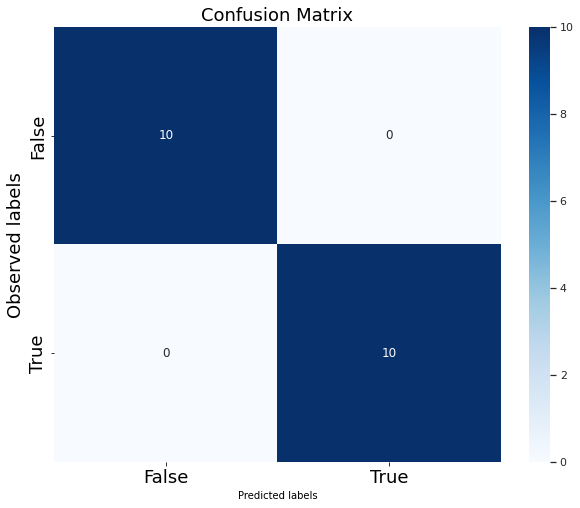

In [ ]:
# Matriz de confusión

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

matriz3 = confusion_matrix(y_val, np.around(pred_test))
plot_confusion_matrix(conf_mat = matriz3, figsize = (10,8))

ax = plt.subplot()
sns.set(font_scale=1) # Adjust to fit
sns.heatmap(matriz3, annot=True, ax=ax, cmap="Blues", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels');
ax.set_ylabel('Observed labels',fontdict=label_font);

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=18)  # Adjust to fit
ax.xaxis.set_ticklabels(['False', 'True']);
ax.yaxis.set_ticklabels(['False', 'True']);

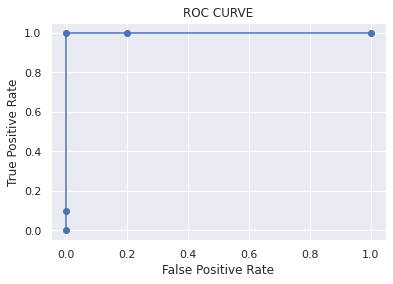

In [ ]:
# Cálculo del AUC y ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr_, tpr_, thresholds_ = roc_curve(y_val, pred_test)

plt.plot(fpr_, tpr_, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.grid(True)


In [ ]:
# Cálculo del AUC

from sklearn import metrics

print(f'El AUC para el modelo de bosques aleatorios es de: {metrics.auc(fpr_, tpr_)}')

El AUC para el modelo de bosques aleatorios es de: 1.0


<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Realizar la predicción con los valores del ráster virtual**

In [ ]:
# Cargar el virtual ráster que se descarga desde el link del repositorio 

import gdal

raster  = gdal.Open('/content/drive/MyDrive/TESIS/VIRTUAL-RASTER/04_Virtual_Raster.tif') # Esta ruta cambia según dónde se guardó el archivo del virtual ráster

In [ ]:
# Extraer las características del ráster

driver = raster.GetDriver()
col   = raster.RasterXSize #número de columnas
rows  = raster.RasterYSize #número de filas
nelem = col*rows #número de píxeles

print('numero de filas: ', rows)
print('numero de columnas: ', col)

In [ ]:
# Guardar las posiciones NonData del ráster. Solo se hace una vez para cualquier banda
# ya que las posiciones de Nonvalue deben ser las mismas para todas las bandas

Nonvalue = raster.GetRasterBand(1).GetNoDataValue()

In [ ]:
#Extraer los valores de cada banda

v1val = raster.GetRasterBand(1).ReadAsArray().flatten()
v2val = raster.GetRasterBand(2).ReadAsArray().flatten()
v3val = raster.GetRasterBand(3).ReadAsArray().flatten()
v4val = raster.GetRasterBand(4).ReadAsArray().flatten()
v5val = raster.GetRasterBand(5).ReadAsArray().flatten()
v6val = raster.GetRasterBand(6).ReadAsArray().flatten()
v7val = raster.GetRasterBand(7).ReadAsArray().flatten()
v8val = raster.GetRasterBand(8).ReadAsArray().flatten()
v9val = raster.GetRasterBand(9).ReadAsArray().flatten()

# Agrupar los valores tal que se forme una matriz de N X 9
# donde N es el número de muestras

DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val,v8val, v9val), axis=1)

In [ ]:
# Organizar los datos y eliminar las posiciones de NonData

NanValues = np.where(v1val == Nonvalue)[0]
cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
#Convertir valores del ráster en un df

df_raster = pd.DataFrame(XX, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

In [ ]:
#Convertir el data frame en un dataset de tensorflow

raster_k = tfdf.keras.pd_dataframe_to_tf_dataset(df_raster)

In [ ]:
# Predecir los valores con el modelo entrenado

y_raster=model.predict(raster_k)

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Exportar el mapa de probabilidad**

In [ ]:
# Crear nuevamente el formato de datos para llevarlo al raster. 
# Usaremos una variable nueva llena de zeros, en la cual insertaremos los NonValues y los valores de la predicción.
# el tamaño de esta variable será el mismo que el raster

Rasterdataarray = np.zeros((rows,col)).flatten()

# cPP contiene las posiciones donde van las predicciones
for i in range(cPP.shape[0]):
    Rasterdataarray[cPP[i]]=y_raster[i]
    
# NanValues contiene las posiciones donde van los NOnValues    
for i in range(NanValues.shape[0]):
    Rasterdataarray[NanValues[i]]=Nonvalue


# guardar la predicción en un raster con las mismas caracteristicas del raster input

Rasterout = driver.Create('/content/drive/MyDrive/TESIS/MAPAS-PROBABILIDAD/04_Random_Forest.tif', col, rows, 1, gdal.GDT_Float32) #esta ruta se modifica según donde desee que se guarde el mapa de probabilidad en su Google Drive
# Write metadata
Rasterout.SetGeoTransform(raster.GetGeoTransform())
Rasterout.SetProjection(raster.GetProjection())

Rasterout.GetRasterBand(1).WriteArray(Rasterdataarray.reshape(rows,col))
Rasterout.GetRasterBand(1).SetNoDataValue(Nonvalue)
Rasterout = None
del Rasterout

<image src="https://drive.google.com/uc?export=view&id=14t_xuo49e4cjV4Dtzlkx6kMYSKfPlDZy" width=5%> **Visualizar el mapa de probabilidad**

In [ ]:
temp1 = Rasterdataarray.copy()
temp1[temp1==Nonvalue] = None

plt.figure(figsize=(10,10))
plt.imshow(   temp1.reshape((rows,col)), aspect='auto',cmap='jet', vmin=0, vmax=1)

plt.colorbar()

# **Créditos**
---

* **Autores:** 
  * [Ana Gabriela Mantilla, Geóloga](https://www.linkedin.com/in/ana-gabriela-mantilla-24377a21a)
  * [Paul Goyes Peñafiel, PhD (c)](https://www.linkedin.com/in/paul-goyes-0212b810/)

# **Forma de citar**

* Mantilla, A. (2023). Predicción de la ocurrencia de depósitos minerales tipo pórfido usando técnicas de aprendizaje automático [Tesis de pregrado, Universidad Industrial de Santander]. https://noesis.uis.edu.co/handle/20.500.14071/12289.


Este código se encuentra protegido bajo una licencia de libre acceso que tiene las siguientes condiciones: 

- Se requiere la preservación de los avisos de derechos de autor y licencia
- Se prohibe el uso de estos códigos con fines lucrativos
- Los autores no se hacen responsables del uso de los códigos por parte de terceros
- En caso de modificaciones al código, deben especificarse en un apartado donde se cite la fuente original de este: https://github.com/Anagabrielamantilla/MineralProspectivityPrediction 
- No se permite la publicación de este código en otras plataformas bajo ninguna circunstancia sin consentimiento de los autores

**Los autores prohiben eliminar, borrar o modificar este apartado**